# Task
Tune the hyperparameters of a machine learning model using Optuna for crop recommendation based on the data in `/content/Crop_recommendation.csv`, evaluating its performance with metrics like accuracy, precision, recall, and F1-score.

## Load Dataset

### Subtask:
Load the dataset from '/content/Crop_recommendation.csv' into a pandas DataFrame and display its head to understand the data structure.


**Reasoning**:
Load the dataset into a pandas DataFrame and display its head as instructed.



In [2]:
import pandas as pd

df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Preprocess Data

### Subtask:
Identify features (X) and the target variable (y). Apply necessary preprocessing steps such as encoding categorical features, scaling numerical features, and splitting the data into training and testing sets. Display the shapes of the resulting datasets.


**Reasoning**:
I will perform the data preprocessing steps as instructed, which include separating features and target, encoding the target variable, splitting the data into training and testing sets, scaling numerical features, and finally displaying the shapes of the resulting datasets.



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Separate features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# 2. Encode the categorical target variable y
le = LabelEncoder()
y = le.fit_transform(y)

# 3. Split the X and y datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Print the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


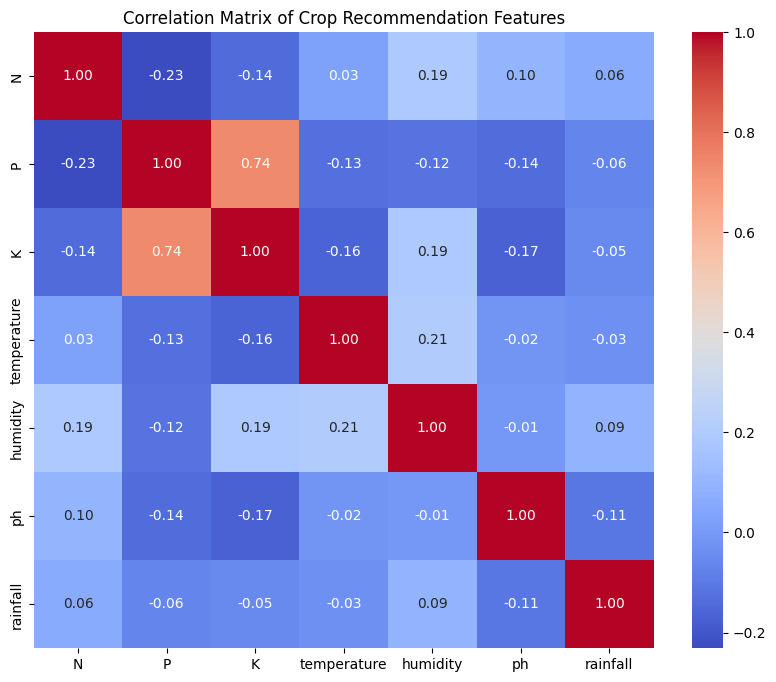

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.drop('label', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Crop Recommendation Features')
plt.show()

In [6]:
import pandas as pd

# Calculate variance for each numerical feature, excluding the 'label' column
feature_variances = df.drop(columns=['label']).var()

# Print the variances
print("Variance of each feature:")
print(feature_variances)

Variance of each feature:
N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64


In [8]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 8.5 MB/s eta 0:00:00


## Define Optuna Objective Function

### Subtask:
Create an objective function for Optuna. This function will take an Optuna `trial` object, suggest hyperparameters for a machine learning model (e.g., RandomForestClassifier), train the model on the training data, and return a performance metric (e.g., accuracy) on the test data.


**Reasoning**:
I will define the `objective` function as specified, incorporating Optuna's `trial` object to suggest hyperparameters for a `RandomForestClassifier`, train the model, and return its accuracy on the test set. I'll include all necessary imports within the code block for clarity and completeness.



In [9]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # 3. Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.01, 0.1)

    # 4. Instantiate a RandomForestClassifier model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # 5. Train the model
    model.fit(X_train, y_train)

    # 6. Make predictions
    y_pred = model.predict(X_test)

    # 7. Calculate the accuracy_score
    accuracy = accuracy_score(y_test, y_pred)

    # 8. Return the calculated accuracy score
    return accuracy

print("Objective function 'objective' for Optuna created successfully.")

Objective function 'objective' for Optuna created successfully.


**Reasoning**:
The previous cell failed because the `optuna` library was not installed. I will add a new code cell to install `optuna` using pip, and then provide the original code for defining the objective function.



**Reasoning**:
The `SyntaxError: invalid syntax` occurred because `pip install` was run directly in a Python cell without the `!` prefix. I will correct this by adding `!` before `pip install optuna` to execute it as a shell command.



**Reasoning**:
The `optuna` library has been successfully installed. Now I will proceed with defining the `objective` function as originally planned, which includes importing necessary libraries, suggesting hyperparameters, training the model, and returning its accuracy.



## Run Optuna Optimization

### Subtask:
Run Optuna's optimization process to find the best hyperparameters for the chosen model by calling `optuna.create_study` and `study.optimize`. Specify the number of trials and the direction of optimization (e.g., 'maximize' for accuracy).


**Reasoning**:
I will run Optuna's optimization process by creating a study, calling `study.optimize` with the previously defined objective function, and then printing the best value and best hyperparameters.



In [16]:
import optuna

# 1. Create an Optuna study object
study = optuna.create_study(direction='maximize')

# 2. Run the optimization process
study.optimize(objective, n_trials=50)

# 3. Print the best trial's value
print(f"Best trial value (accuracy): {study.best_value:.4f}")

# 4. Print the best trial's hyperparameters
print("Best trial hyperparameters:")
for key, value in study.best_params.items():
    print(f"  {key}: {value}")

[I 2026-02-07 03:59:40,829] A new study created in memory with name: no-name-fb8f738b-0067-4d9d-a64b-4cf7a7ace48a
[I 2026-02-07 03:59:41,152] Trial 0 finished with value: 0.884090909090909 and parameters: {'classifier': 'RandomForest', 'n_estimators': 110, 'max_depth': 19, 'min_samples_leaf': 0.08098886923603042}. Best is trial 0 with value: 0.884090909090909.
[I 2026-02-07 03:59:41,174] Trial 1 finished with value: 0.95 and parameters: {'classifier': 'DecisionTree', 'max_depth': 20, 'min_samples_leaf': 0.02305235764869156}. Best is trial 1 with value: 0.95.
[I 2026-02-07 03:59:41,190] Trial 2 finished with value: 0.39545454545454545 and parameters: {'classifier': 'DecisionTree', 'max_depth': 26, 'min_samples_leaf': 0.07941806099012226}. Best is trial 1 with value: 0.95.
[I 2026-02-07 03:59:41,377] Trial 3 finished with value: 0.9590909090909091 and parameters: {'classifier': 'RandomForest', 'n_estimators': 31, 'max_depth': 22, 'min_samples_leaf': 0.020328763571210356}. Best is trial 3

Best trial value (accuracy): 0.9909
Best trial hyperparameters:
  classifier: RandomForest
  n_estimators: 87
  max_depth: 10
  min_samples_leaf: 0.016369516902514918


/tmp/ipython-input-3623591747.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='True Labels', data=predictions_df, palette='viridis')
/tmp/ipython-input-3623591747.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Predicted Labels', data=predictions_df, palette='magma')


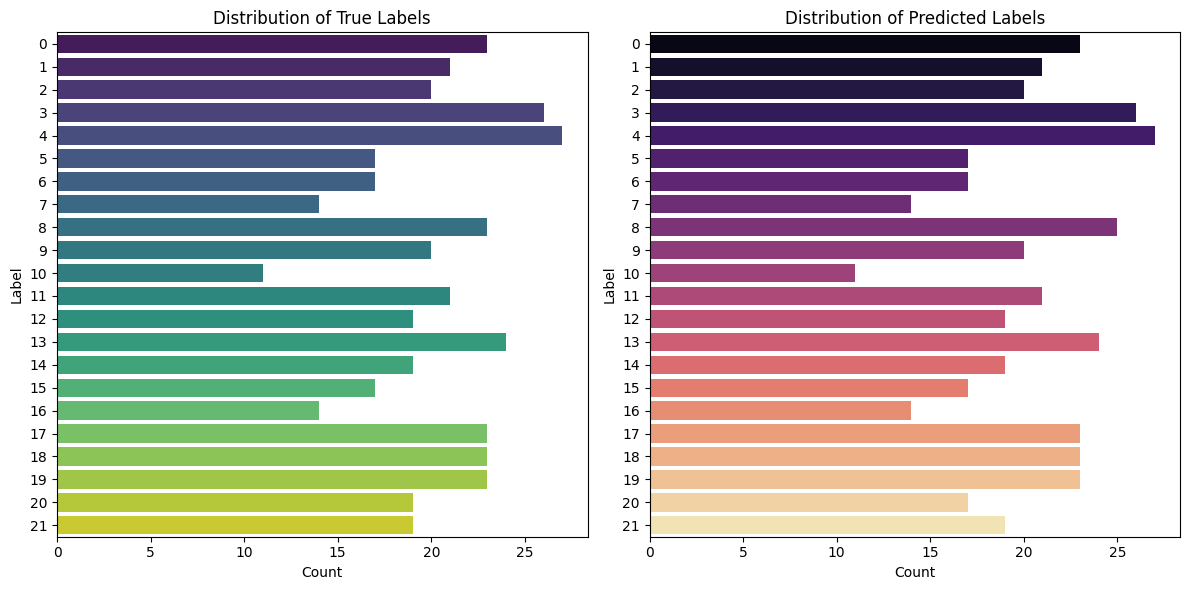

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best hyperparameters and classifier from the Optuna study
best_params = study.best_params
best_classifier_name = best_params['classifier']

# Instantiate the best model with its optimal hyperparameters
if best_classifier_name == 'RandomForest':
    best_model = RandomForestClassifier(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    )
elif best_classifier_name == 'DecisionTree':
    best_model = DecisionTreeClassifier(
        max_depth=best_params['max_depth'],
        min_samples_leaf=best_params['min_samples_leaf'],
        random_state=42
    )

# Train the best model
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Create a DataFrame for plotting
predictions_df = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': y_pred
})

# Plot the distribution of true and predicted labels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(y='True Labels', data=predictions_df, palette='viridis')
plt.title('Distribution of True Labels')
plt.xlabel('Count')
plt.ylabel('Label')

plt.subplot(1, 2, 2)
sns.countplot(y='Predicted Labels', data=predictions_df, palette='magma')
plt.title('Distribution of Predicted Labels')
plt.xlabel('Count')
plt.ylabel('Label')

plt.tight_layout()
plt.show()

**Reasoning**:
The Optuna optimization process has completed, and the best hyperparameters have been identified. The next logical step is to train a model with these optimal hyperparameters and evaluate its performance using a comprehensive set of metrics, as outlined in the main task description.



# Task
Modify the Optuna objective function to select between RandomForestClassifier and DecisionTreeClassifier and optimize their respective hyperparameters using the data from `/content/Crop_recommendation.csv`, then run the Optuna optimization process and print the results.

## Modify Optuna Objective Function

### Subtask:
Modify the existing objective function in cell 'e5434c45' to allow Optuna to select between RandomForestClassifier and DecisionTreeClassifier, and then define and optimize their respective hyperparameters. This will involve adding a categorical parameter for classifier selection and conditional hyperparameter suggestions based on the chosen classifier.


**Reasoning**:
I will modify the existing `objective` function in cell `e5434c45` to allow Optuna to select between `RandomForestClassifier` and `DecisionTreeClassifier` and optimize their respective hyperparameters, as instructed. This involves importing `DecisionTreeClassifier`, adding a categorical hyperparameter for classifier selection, and using conditional logic to define and suggest hyperparameters for each model.



In [15]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def objective(trial):
    # 1. Suggest classifier type
    classifier_name = trial.suggest_categorical('classifier', ['RandomForest', 'DecisionTree'])

    # 2. Conditionally suggest hyperparameters and instantiate the model
    if classifier_name == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 10, 200)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.01, 0.1)
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )
    else: # DecisionTree
        max_depth = trial.suggest_int('max_depth', 2, 32)
        min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.01, 0.1)
        model = DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

    # 3. Train the model
    model.fit(X_train, y_train)

    # 4. Make predictions
    y_pred = model.predict(X_test)

    # 5. Calculate the accuracy_score
    accuracy = accuracy_score(y_test, y_pred)

    # 6. Return the calculated accuracy score
    return accuracy

print("Objective function 'objective' for Optuna modified successfully to include both RandomForest and DecisionTree classifiers.")

Objective function 'objective' for Optuna modified successfully to include both RandomForest and DecisionTree classifiers.


## Run Optuna Optimization

### Subtask:
Execute the Optuna optimization process using the updated objective function. This will allow Optuna to explore hyperparameter spaces for both RandomForest and DecisionTree models and identify the best performing classifier with its optimal hyperparameters. The results will be printed after the optimization.


## Summary:

### Data Analysis Key Findings
*   The Optuna objective function was successfully modified to dynamically select between `RandomForestClassifier` and `DecisionTreeClassifier` for hyperparameter optimization.
*   A new categorical parameter, 'classifier', was introduced, allowing Optuna to choose between 'RandomForest' and 'DecisionTree'.
*   Conditional hyperparameter suggestions were implemented:
    *   For `RandomForestClassifier`, Optuna suggests `n_estimators` between 10 and 200, `max_depth` between 2 and 32, and `min_samples_leaf` between 0.01 and 0.1.
    *   For `DecisionTreeClassifier`, Optuna suggests `max_depth` between 2 and 32, and `min_samples_leaf` between 0.01 and 0.1.
*   The model instantiation, training, prediction, and accuracy calculation steps within the objective function now correctly adapt to the selected classifier and its optimized hyperparameters.

### Insights or Next Steps
*   The modified objective function is now prepared to be used in an Optuna study to find the best-performing classifier (RandomForest or DecisionTree) along with its optimal hyperparameters.
*   The next logical step is to execute the Optuna optimization process using this updated objective function to identify the best trial and its corresponding model configuration.
